**GRUPO 1**

- Daniel Aguilera
- Gianella Salluzzi
- Gisela Turletti
- Guillermo More
- Marcos Savy 

Fecha de Entrega: 03/10/2021


##Importamos las librerías

In [ ]:
import numpy as np
import pandas as pd

#visualización de librerías
import matplotlib.pyplot as plt
import seaborn as sns

#preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#separar el dataset en train y test 
from sklearn.model_selection import train_test_split

#modelos para predicción
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#modelos en conjunto para mejor rendimiento
from sklearn.ensemble import RandomForestClassifier

#métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#matriz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#ignore warning to make notebook prettier
import warnings
warnings.filterwarnings('ignore')

##Importamos los datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('drive/MyDrive/Data Science ICARO/Projects/train.csv', na_values= "?").drop(['index'], axis=1) 
df_train.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639


Eliminamos el índice ya que no lo consideramos necesarios.

In [ ]:
df_test = pd.read_csv('drive/MyDrive/Data Science ICARO/Projects/test.csv', na_values= "?").drop(['index'], axis=1) 
df_test.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,ID
0,53,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States,3643
1,18,NaN,11th,7,Never-married,NaN,Own-child,White,Male,0,0,25,United-States,16036
2,42,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,United-States,9401
3,49,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,United-States,17903
4,58,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,5198


In [ ]:
df_train = df_train.set_index(['ID'])
df_train.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
ID,,,,,,,,,,,,,,
24451,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K
985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K
30229,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K
7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
27639,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K


Hacemos lo mismo para df_test

In [ ]:
df_test = df_test.set_index(['ID'])
df_test.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
ID,,,,,,,,,,,,,
3643,53,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States
16036,18,NaN,11th,7,Never-married,NaN,Own-child,White,Male,0,0,25,United-States
9401,42,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,United-States
17903,49,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,United-States
5198,58,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States


##**DATA EXPLORATION**

In [ ]:
df_train.shape

(27656, 14)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27656 entries, 24451 to 23654
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             27656 non-null  int64 
 1   workclass       26117 non-null  object
 2   education       27656 non-null  object
 3   education.num   27656 non-null  int64 
 4   marital.status  27656 non-null  object
 5   occupation      26110 non-null  object
 6   relationship    27656 non-null  object
 7   race            27656 non-null  object
 8   sex             27656 non-null  object
 9   capital.gain    27656 non-null  int64 
 10  capital.loss    27656 non-null  int64 
 11  hours.per.week  27656 non-null  int64 
 12  native.country  27152 non-null  object
 13  income          27656 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
df_train.isna().sum()

age                  0
workclass         1539
education            0
education.num        0
marital.status       0
occupation        1546
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     504
income               0
dtype: int64

In [ ]:
df_train.isna().sum() / df_train.shape[0]*100

age               0.000000
workclass         5.564796
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.590107
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.822389
income            0.000000
dtype: float64

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,27656.0,38.610356,13.659928,17.0,28.0,37.0,48.0,90.0
education.num,27656.0,10.093506,2.566083,1.0,9.0,10.0,12.0,16.0
capital.gain,27656.0,1099.991503,7487.323462,0.0,0.0,0.0,0.0,99999.0
capital.loss,27656.0,88.284387,405.821328,0.0,0.0,0.0,0.0,4356.0
hours.per.week,27656.0,40.446666,12.369212,1.0,40.0,40.0,45.0,99.0


- Luego de este análisis, podemos ver que capital.gain y capital.loss se encuentran muy dispersos con una variación demasiado alta. Con lo estudiado, sabemos que esto puede significar que contiene mucha información o que tiene outliers. En nuestro caso es la última opción, debido a que nuestro dataset contiene datos extremos y en la mayoría de las filas son 0 (cero).
- Por otro lado, el promedio de la edad es de 38,61 años y la media es 37 (si vemos el percentil 50%), con esto nos referimos a que estas personas deben ser encargados de sus familias. Por lo que, esto lo deberíamos considerar a la hora de realizar las predicciones.
- Por último, las horas trabajadas por semana van a variar de acuerdo al país del que proviene y el tipo de trabajo al que se dedique esa persona, además si es emprendedor o jefe y si tiene o no una profesión.

#**Variables**

##*Numéricas (cuantitativas):*

- age
- education.num
- capital.gain
- capita.loss
- hours.per.week

##*Categóricas:*

- workclass
- education
- marital.status	
- occupation
- relationship
- race
- sex
- native.country
- income

##Análisis de las columnas categóricas


Ahora, vamos a explorar las columnas categóricas para encontrar inferencias luego de este análisis:

Vamos a ir modificando nuestro df_test simultáneamente para que queden los datos de igual manera procesados.

####Education y Education.num

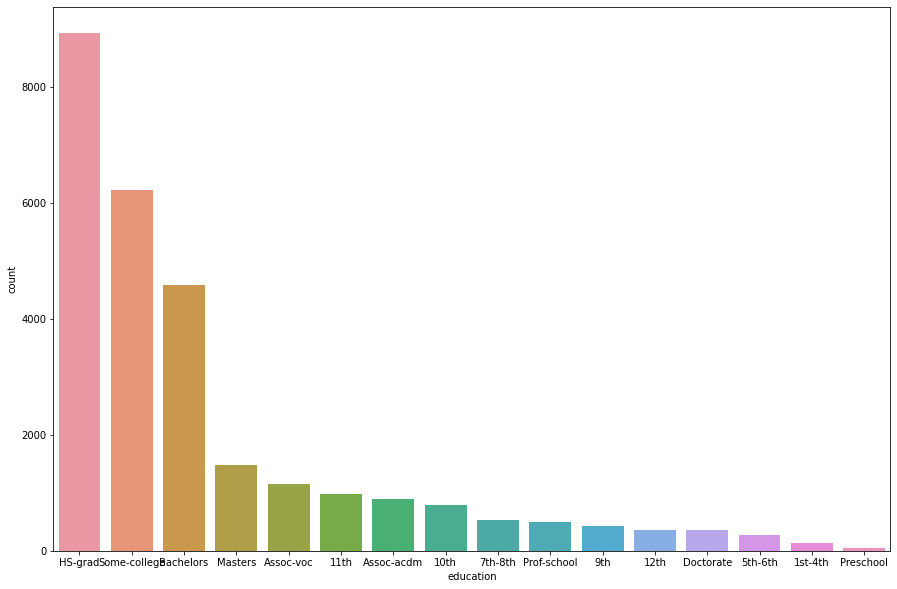

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['education'], order = df_train.education.value_counts().index)
plt.show()

Como vemos, la mayor parte tiene al menos un título secundario, bachelor o realizó una parte de alguna carrera universitaria.

Analizando los datos, nos dimos cuenta de que el nivel de educación se corresponde con un valor numérico de la columna 'education number', por lo cual, vamos a dropear esa variable categórica.

In [ ]:
df_train.value_counts(['education.num', 'education'], ascending = False)

education.num  education   
9              HS-grad         8934
10             Some-college    6223
13             Bachelors       4583
14             Masters         1474
11             Assoc-voc       1147
7              11th             982
12             Assoc-acdm       886
6              10th             794
4              7th-8th          535
15             Prof-school      495
5              9th              429
8              12th             365
16             Doctorate        352
3              5th-6th          275
2              1st-4th          139
1              Preschool         43
dtype: int64

| Education number| Education |
|-----------------|:------------|
|1                | Preschool
|2                |1st - 4th
|3                |5th - 6th 
|4                |7th - 8th
|5                |9th
|6                |10th
|7                |11th
|8                |12th
|9                |HS - grad 
|10               |Some-college
|11               |Assoc-voc
|12               |Assoc-acdm
|13               |Bachelors
|14               |Masters
|15               |Prof-school
|16               |Doctorate

In [ ]:
df_train = df_train.drop(['education'], axis = 1)
df_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
ID,,,,,,,,,,,,,
24451,30,Local-gov,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K
985,37,Private,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K
30229,41,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K
7107,45,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
27639,28,Private,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [ ]:
df_test = df_test.drop(['education'], axis = 1)
df_test.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
ID,,,,,,,,,,,,
3643,53,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States
16036,18,NaN,7,Never-married,NaN,Own-child,White,Male,0,0,25,United-States
9401,42,Private,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,United-States
17903,49,Self-emp-inc,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,United-States
5198,58,Local-gov,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States


Observando la información sobre los niveles educativos en Estados Unidos, buscamos mejorar y hacer más eficiente el conjunto de datos, es decir, recategorizar.

A continuación, agruparemos nuestra variable education.num de la siguiente manera:

| education.num | Nivel educativo | Nuevo Valor |
|---------------|:----------------|:-------------|
|1 - 8          |Sin finalizar educación básica  | 1 |
|9              |Egresado de High School (secundario completo) | 2 |
|10             |Estudios terciarios y/o universitarios incompletos | 3 |
|11 - 12        |Título de pregrado | 4 |
|13             |Título de grado | 5 |
|14 - 15        |Título de Posgrado | 6 |
|16             |Doctorado (PhD) | 7 |

In [ ]:
df_train['education.num'][df_train["education.num"]<=8] =  1
df_train['education.num'][df_train["education.num"]==9] =  2
df_train['education.num'][df_train["education.num"]==10] =  3
df_train['education.num'][(df_train["education.num"]==11) | (df_train["education.num"]==12)] =  4
df_train['education.num'][df_train["education.num"]==13] =  5
df_train['education.num'][(df_train["education.num"]==14) | (df_train["education.num"]==15)] =  6
df_train['education.num'][df_train["education.num"]==16] =  7

In [ ]:
df_test['education.num'][df_test["education.num"]<=8] =  1
df_test['education.num'][df_test["education.num"]==9] =  2
df_test['education.num'][df_test["education.num"]==10] =  3
df_test['education.num'][(df_test["education.num"]==11) | (df_test["education.num"]==12)] =  4
df_test['education.num'][df_test["education.num"]==13] =  5
df_test['education.num'][(df_test["education.num"]==14) | (df_test["education.num"]==15)] =  6
df_test['education.num'][df_test["education.num"]==16] =  7

In [ ]:
df_train['education.num'].value_counts(ascending = False)

2    8934
3    6223
5    4583
1    3562
4    2033
6    1969
7     352
Name: education.num, dtype: int64

In [ ]:
df_train.groupby(['education.num', 'income']).size()

education.num  income
1              <=50K     3376
               >50K       186
2              <=50K     7475
               >50K      1459
3              <=50K     5044
               >50K      1179
4              <=50K     1523
               >50K       510
5              <=50K     2668
               >50K      1915
6              <=50K      774
               >50K      1195
7              <=50K       93
               >50K       259
dtype: int64

Gracias a esto, podemos ver que gran parte de las personas que abandonaron la educación obligatoria tiene ingresos <= 50k, quizás las que ganan más, han podido aprender algún oficio o crear un emprendimiento.

Además, si hacemos la comparación con el máximo nivel académico que se puede alcanzar que es el PhD, también encontramos una minoría que gana <= 50k anuales.

Podemos observar como a partir de estudios terciarios/universitarios (cat 3) aumenta el monto anual, y son más las personas a las que les ingresa > 50k.

####Workclass

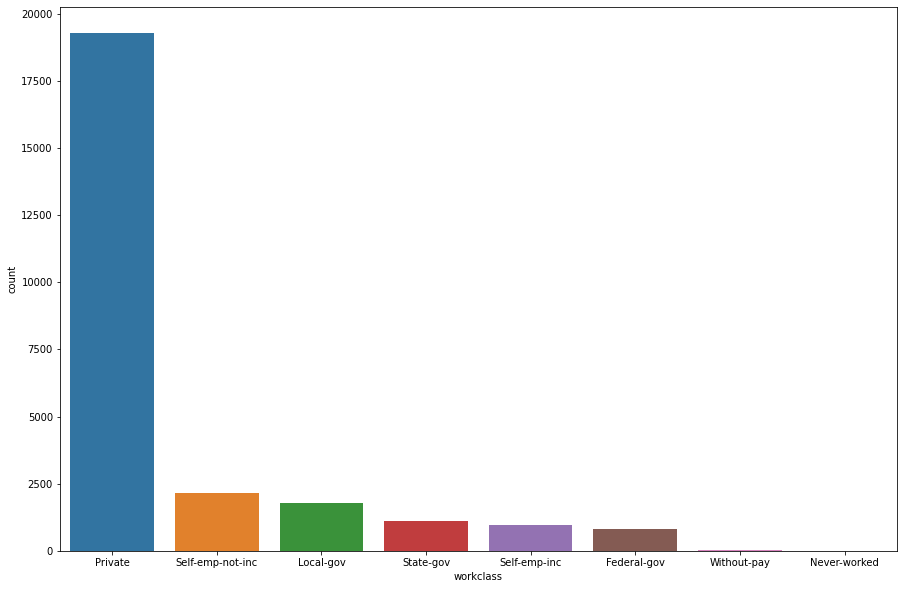

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['workclass'], order = df_train.workclass.value_counts().index)
plt.show()

La mayoría de las personas representadas en el gráfico trabajan en el sector privado, pero no tenemos muchas más info sobre eso.

In [ ]:
df_train['workclass'].value_counts()

Private             19279
Self-emp-not-inc     2156
Local-gov            1769
State-gov            1117
Self-emp-inc          953
Federal-gov           822
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df_train.groupby(['workclass','income']).size()

workclass         income
Federal-gov       <=50K       503
                  >50K        319
Local-gov         <=50K      1244
                  >50K        525
Never-worked      <=50K         7
Private           <=50K     15039
                  >50K       4240
Self-emp-inc      <=50K       418
                  >50K        535
Self-emp-not-inc  <=50K      1541
                  >50K        615
State-gov         <=50K       810
                  >50K        307
Without-pay       <=50K        14
dtype: int64

Vemos que en las categorías de 'Never-worked' y 'Without-pay' siempre tienen ingresos menores a 50k anuales, obviamente debido al hecho de que no tienen ingresos. 

In [ ]:
df_train.income[(df_train.workclass == 'Without-pay') | (df_train.workclass == 'Never-worked')].unique()

array(['<=50K'], dtype=object)

Vamos a ver cómo aparece en df_test

In [ ]:
df_test[(df_test.workclass == 'Without-pay') | (df_test.workclass == 'Never-worked')]

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
ID,,,,,,,,,,,,


En df_test no contamos con las categorías 'Without-pay'y 'Never-worked'.Entonces, vamos a eliminar esas filas debido a que no generan valor a nuestra predicción.

In [ ]:
df_train = df_train.drop(df_train[(df_train.workclass == 'Without-pay') | (df_train.workclass == 'Never-worked')].index)

Corroboramos que se hayan dropeado correctamente:

In [ ]:
df_train.workclass.unique()

array(['Local-gov', 'Private', 'Federal-gov', 'Self-emp-not-inc', nan,
       'State-gov', 'Self-emp-inc'], dtype=object)

A partir de esto, sacamos las siguientes conclusiones:

- Las personas que pertenecen a 'worked without pay' y 'never worked' obviamente cobran <= 50k.
- La mayor cantidad de personas que pertenecen al sector privado cobran < 50k anuales, comparando con la parte que cobra > 50k que son 3 veces menos aprox.


In [ ]:
df_train.groupby(['education.num','workclass']).size()

education.num  workclass       
1              Federal-gov           20
               Local-gov            126
               Private             2696
               Self-emp-inc          59
               Self-emp-not-inc     260
               State-gov             53
2              Federal-gov          231
               Local-gov            426
               Private             6615
               Self-emp-inc         245
               Self-emp-not-inc     732
               State-gov            225
3              Federal-gov          214
               Local-gov            333
               Private             4359
               Self-emp-inc         183
               Self-emp-not-inc     413
               State-gov            278
4              Federal-gov           80
               Local-gov            139
               Private             1442
               Self-emp-inc          61
               Self-emp-not-inc     150
               State-gov             70
5       

Acá podemos ver una relacion entre education y workclass.

- Las personas que trabajan sin paga podemos ver que pertenecen a las categorías 1, 2, 3 y 4. 
- Un caso similar es con las personas que nunca trabajaron ya que se encuentran en las categorías 1, 2 y 3.
- Sin importar el nivel de educación, la mayoría de las personas trabajan en el sector privado.

En esta variable recordemos que teníamos aprox 5,8% de los valores nulos, por lo que los vamos a rellenar con la moda:

In [ ]:
df_train['workclass'] = df_train['workclass'].fillna(df_train['workclass'].mode().values[0], inplace = False)
df_train['workclass']

ID
24451           Local-gov
985               Private
30229             Private
7107              Private
27639             Private
               ...       
29802             Private
5390              Private
860           Federal-gov
15795             Private
23654    Self-emp-not-inc
Name: workclass, Length: 27635, dtype: object

In [ ]:
df_test['workclass'] = df_test['workclass'].fillna(df_test['workclass'].mode().values[0], inplace = False)
df_test['workclass']

ID
3643          Private
16036         Private
9401          Private
17903    Self-emp-inc
5198        Local-gov
             ...     
19468         Private
7554        State-gov
25076         Private
9731          Private
25258         Private
Name: workclass, Length: 4881, dtype: object

####Marital Status

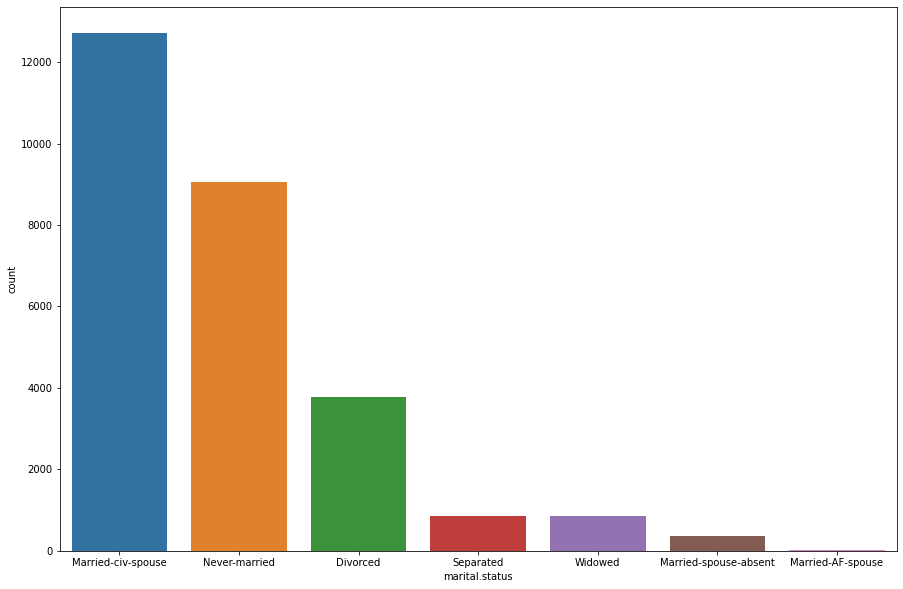

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(df_train['marital.status'], order = df_train['marital.status'].value_counts().index)
plt.show()

In [ ]:
df_train['marital.status'].value_counts()

Married-civ-spouse       12711
Never-married             9056
Divorced                  3769
Separated                  857
Widowed                    856
Married-spouse-absent      365
Married-AF-spouse           21
Name: marital.status, dtype: int64

In [ ]:
df_train.groupby(['marital.status','income']).size()

marital.status         income
Divorced               <=50K     3361
                       >50K       408
Married-AF-spouse      <=50K       12
                       >50K         9
Married-civ-spouse     <=50K     7001
                       >50K      5710
Married-spouse-absent  <=50K      333
                       >50K        32
Never-married          <=50K     8644
                       >50K       412
Separated              <=50K      800
                       >50K        57
Widowed                <=50K      781
                       >50K        75
dtype: int64

La diferencia más grande en este caso la encontramos en las personas que nunca han estado casadas debido a que el mayor porcentaje de ellas cobra menos de 50k anuales, probablemente porque son muy jóvenes y no cuentan con mucha experiencia.

In [ ]:
df_train.groupby(['marital.status', 'workclass']).size()

marital.status         workclass       
Divorced               Federal-gov          150
                       Local-gov            314
                       Private             2796
                       Self-emp-inc          85
                       Self-emp-not-inc     250
                       State-gov            174
Married-AF-spouse      Federal-gov            2
                       Private               16
                       Self-emp-not-inc       2
                       State-gov              1
Married-civ-spouse     Federal-gov          405
                       Local-gov            859
                       Private             8791
                       Self-emp-inc         716
                       Self-emp-not-inc    1427
                       State-gov            513
Married-spouse-absent  Federal-gov            6
                       Local-gov             21
                       Private              290
                       Self-emp-inc           5


Nuevamente, podemos ver claramente que la mayoría de las personas de cada categoría trabajan principalmente en el sector privado.

In [ ]:
df_train.groupby(['marital.status','education.num']).size()

marital.status         education.num
Divorced               1                 383
                       2                1374
                       3                 904
                       4                 376
                       5                 457
                       6                 248
                       7                  27
Married-AF-spouse      2                  12
                       3                   3
                       4                   3
                       5                   3
Married-civ-spouse     1                1391
                       2                4118
                       3                2422
                       4                 942
                       5                2396
                       6                1203
                       7                 239
Married-spouse-absent  1                  85
                       2                 108
                       3                  70
                  

Gran parte de las personas que tienen títulos secundarios, masters, bachelors o parte de universidad cursada tienden a tener matrimonios por civil. Y no vemos gran cantidad de divorcios en relación a los casamientos.

Analizando las diferentes clasificaciones y valores de la columna referida al estado civil, luego de investigar sobre los significados de cada categoría, decidimos agruparlos de la siguiente forma para poder trabajar mejor y de manera más eficaz:


| marital.status | Nueva clasificación 
|---------------|:----------------|
|Married-civ-spouse   | Married
|Married-AF-spouse    | Married
|Married-spouse-absent |Married
|Divorced     |Separated
|Separated       |Separated
|Widowed       |Widowed
|Never-married    |Never-married

Realizamos estos cambios porque según lo que investigamos, concluimos que:

- Married-civ-spouse: casamiento por civil
- Married-AF-spouse: matrimonio donde uno de los dos se encuentra en las fuerzas armadas
- Married-spouse-absent: están casados pero viven en casas separadas
- Divorced: papeles de divorcio ya firmados
- Separated: separados pero no ante la ley
- Widowed: viudos
- Never-married: nunca se casaron

In [ ]:
  df_train['marital.status'][df_train['marital.status'] == 'Married-civ-spouse'] =  'Married'
  df_train['marital.status'][df_train['marital.status'] == 'Married-AF-spouse'] =  'Married'
  df_train['marital.status'][df_train['marital.status'] == 'Married-spouse-absent'] =  'Married'
  df_train['marital.status'][df_train['marital.status'] == 'Divorced'] =  'Separated'
  df_train['marital.status'][df_train['marital.status'] == 'Separated'] =  'Separated'
  df_train['marital.status'][df_train['marital.status'] == 'Widowed'] =  'Widowed'
  df_train['marital.status'][df_train['marital.status'] == 'Never-married'] =  'Never-married'

In [ ]:
 df_test['marital.status'][df_test['marital.status'] == 'Married-civ-spouse'] =  'Married'
 df_test['marital.status'][df_test['marital.status'] == 'Married-AF-spouse'] =  'Married'
 df_test['marital.status'][df_test['marital.status'] == 'Married-spouse-absent'] =  'Married'
 df_test['marital.status'][df_test['marital.status'] == 'Divorced'] =  'Separated'
 df_test['marital.status'][df_test['marital.status'] == 'Separated'] =  'Separated'
 df_test['marital.status'][df_test['marital.status'] == 'Widowed'] =  'Widowed'
 df_test['marital.status'][df_test['marital.status'] == 'Never-married'] =  'Never-married'

####Native country

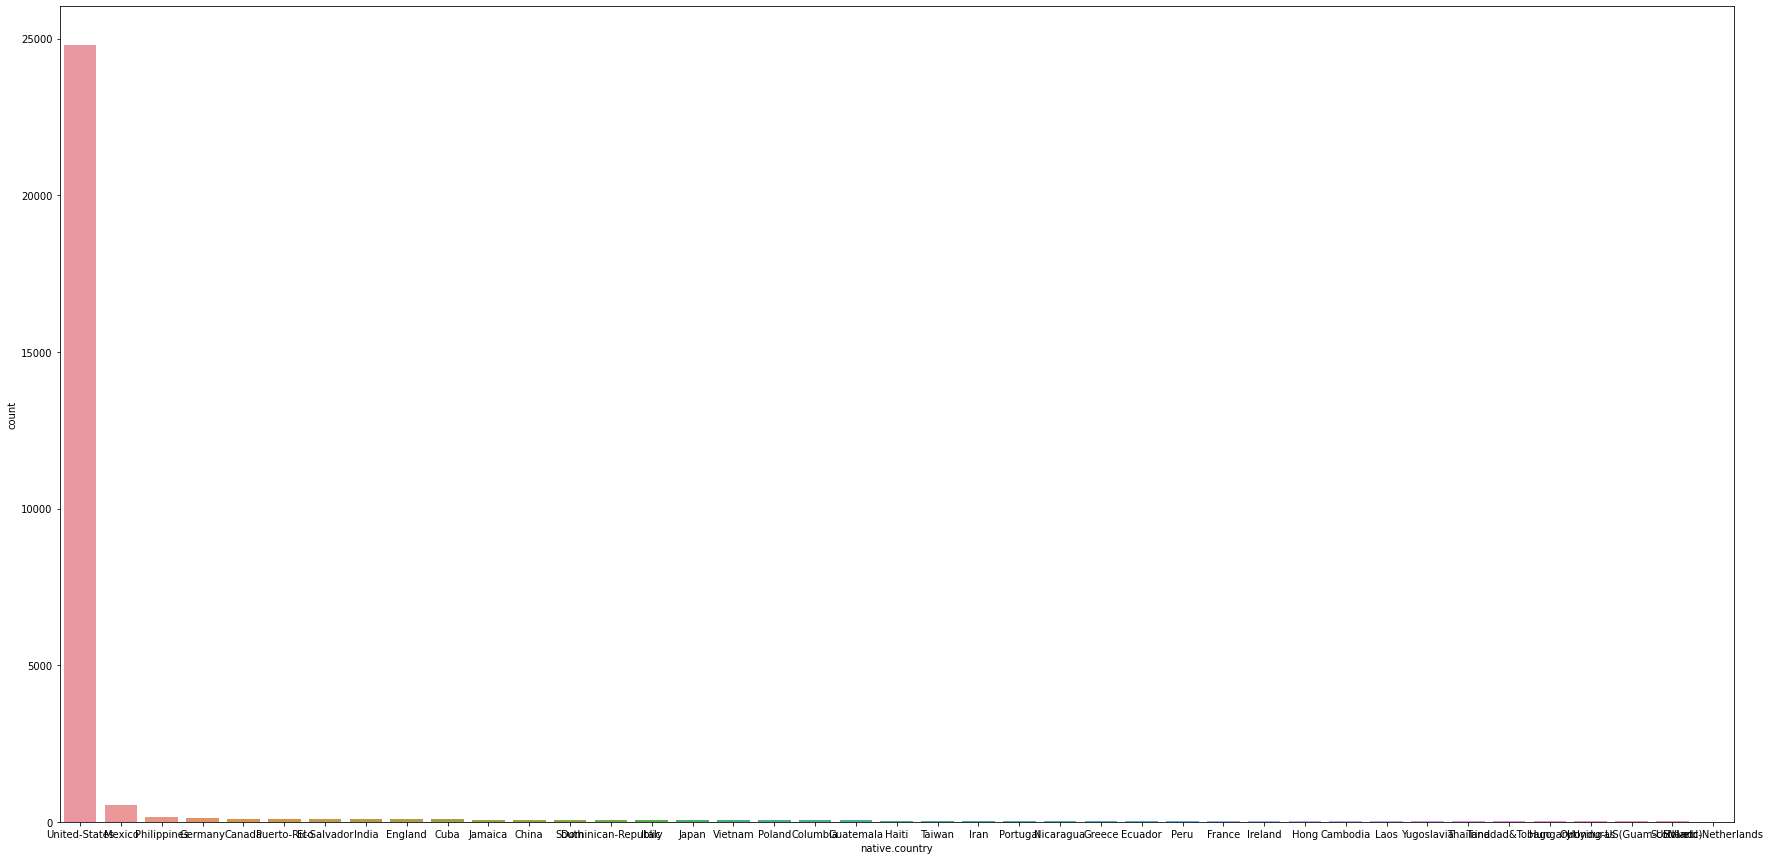

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(df_train['native.country'], order = df_train['native.country'].value_counts().index)
plt.show()

In [ ]:
df_train.value_counts('native.country', normalize = True)*100

native.country
United-States                 91.375180
Mexico                         1.960857
Philippines                    0.611846
Germany                        0.398069
Canada                         0.357525
Puerto-Rico                    0.346467
El-Salvador                    0.346467
India                          0.309609
England                        0.287494
Cuba                           0.283808
Jamaica                        0.265379
China                          0.239578
Dominican-Republic             0.235893
South                          0.235893
Italy                          0.224835
Vietnam                        0.206406
Japan                          0.206406
Poland                         0.176919
Columbia                       0.169548
Guatemala                      0.162176
Haiti                          0.151119
Taiwan                         0.147433
Iran                           0.140061
Portugal                       0.129004
Nicaragua                

Como vemos que Estados Unidos representa el 91% de la totalidad del dataset, decidimos analizar el resto de los países en conjunto, para poder utilizar esos datos y no dropearlos. Recordemos que en esta variable tenemos 1,8% de datos nulos y los vamos a agrupar con países distintos a USA.

In [ ]:
df_train['native.country'][df_train['native.country'] == 'United-States'] = 1 
df_train['native.country'][df_train['native.country'] != 'United-States'] = 0

In [ ]:
df_test['native.country'][df_test['native.country'] == 'United-States'] = 1 
df_test['native.country'][df_test['native.country'] != 'United-States'] = 0

####Occupation

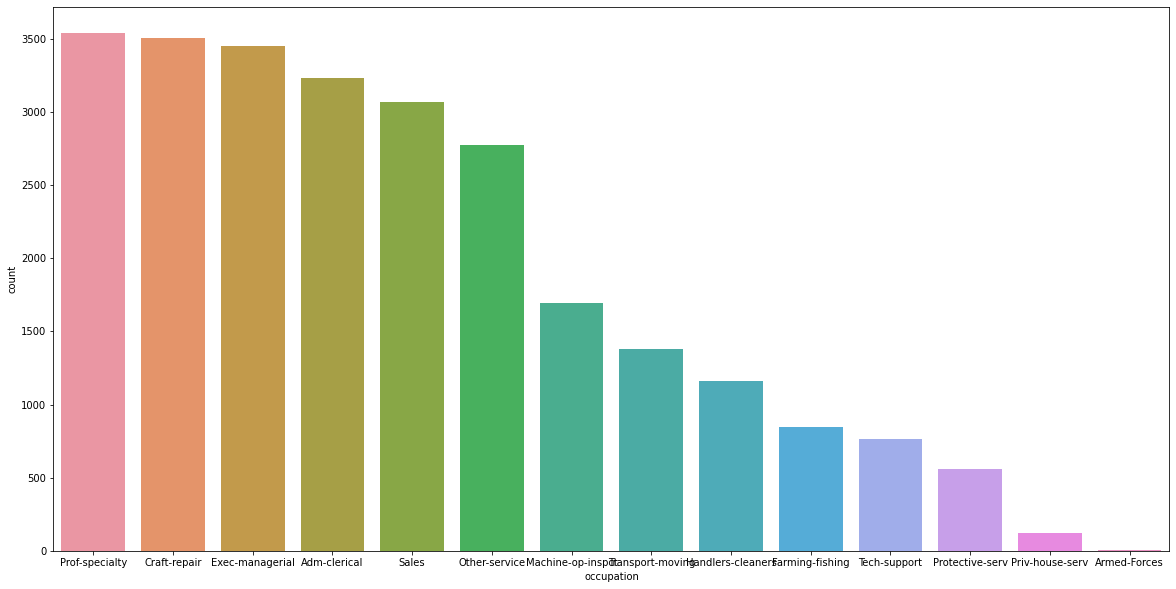

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(df_train['occupation'], order = df_train.occupation.value_counts().index)
plt.show()

In [ ]:
df_train['occupation'].value_counts()

Prof-specialty       3539
Craft-repair         3508
Exec-managerial      3450
Adm-clerical         3234
Sales                3065
Other-service        2773
Machine-op-inspct    1691
Transport-moving     1377
Handlers-cleaners    1161
Farming-fishing       847
Tech-support          767
Protective-serv       557
Priv-house-serv       120
Armed-Forces            7
Name: occupation, dtype: int64

Recordemos que en esta columna teníamos aprox 5,8% de los valores que eran nulos. Veamos si realizando conexiones con algunas otras columnas podemos encontrar un valor para reemplazar esos nulos y no eliminarlos.

In [ ]:
df_train.groupby(['occupation', 'education.num']).size()

occupation        education.num
Adm-clerical      1                 149
                  2                1180
                  3                1089
                  4                 302
                  5                 444
                                   ... 
Transport-moving  3                 247
                  4                  52
                  5                  53
                  6                  10
                  7                   1
Length: 89, dtype: int64

In [ ]:
df_train.groupby(['occupation', 'workclass']).size()

occupation        workclass       
Adm-clerical      Federal-gov          277
                  Local-gov            242
                  Private             2427
                  Self-emp-inc          24
                  Self-emp-not-inc      45
                                      ... 
Transport-moving  Local-gov            101
                  Private             1092
                  Self-emp-inc          25
                  Self-emp-not-inc     104
                  State-gov             33
Length: 74, dtype: int64

Rellenamos los nulos con la moda de la columna ocupation.

In [ ]:
df_train['occupation'] = df_train['occupation'].fillna(df_train['occupation'].mode().values[0], inplace = False)
df_train['occupation']

ID
24451     Protective-serv
985       Exec-managerial
30229        Craft-repair
7107       Prof-specialty
27639     Exec-managerial
               ...       
29802    Transport-moving
5390       Prof-specialty
860          Tech-support
15795               Sales
23654     Exec-managerial
Name: occupation, Length: 27635, dtype: object

In [ ]:
df_test['occupation'] = df_test['occupation'].fillna(df_test['occupation'].mode().values[0], inplace = False)
df_test['occupation']

ID
3643     Machine-op-inspct
16036      Exec-managerial
9401     Machine-op-inspct
17903       Prof-specialty
5198        Prof-specialty
               ...        
19468         Craft-repair
7554          Adm-clerical
25076         Adm-clerical
9731          Adm-clerical
25258         Craft-repair
Name: occupation, Length: 4881, dtype: object

Y corroboramos que se haya realizado correctamente el cambio.

In [ ]:
df_train['occupation'].isna().sum()

0

####Race

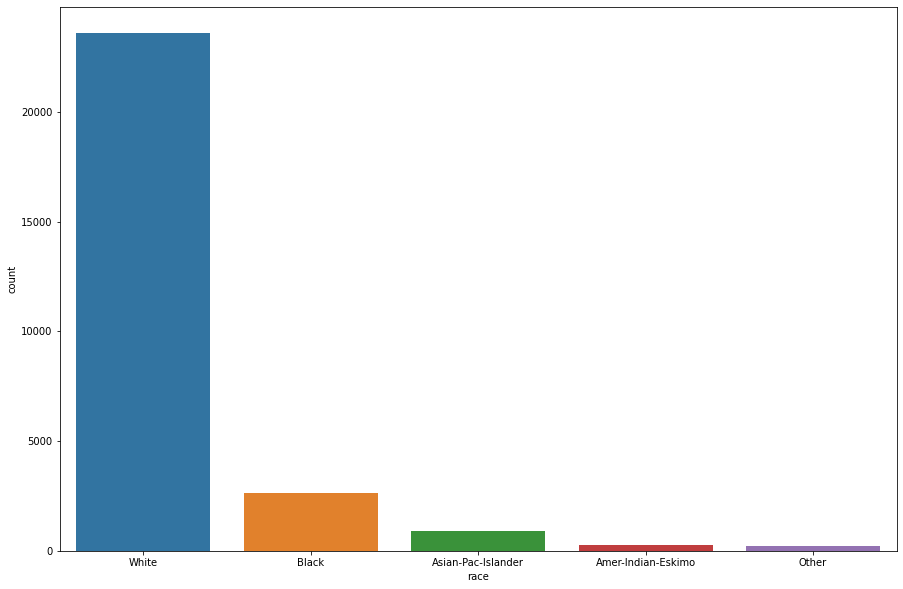

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df_train['race'])
plt.show()

In [ ]:
df_train['race'].value_counts(normalize = True)

White                 0.854134
Black                 0.095748
Asian-Pac-Islander    0.032025
Amer-Indian-Eskimo    0.009517
Other                 0.008576
Name: race, dtype: float64

Predomina la raza blanca sobre las demás con un 85%

In [ ]:
df_train.groupby(['race', 'income']).size()

race                income
Amer-Indian-Eskimo  <=50K       234
                    >50K         29
Asian-Pac-Islander  <=50K       650
                    >50K        235
Black               <=50K      2325
                    >50K        321
Other               <=50K       214
                    >50K         23
White               <=50K     17509
                    >50K       6095
dtype: int64

####Sex

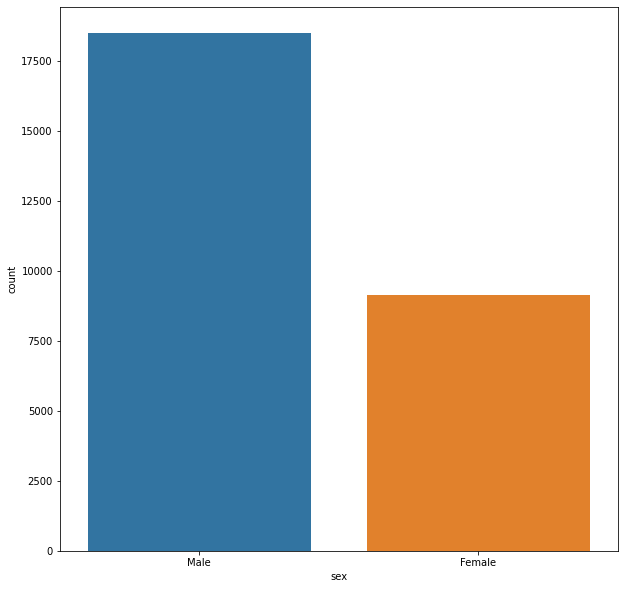

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df_train['sex'], order = df_train.sex.value_counts().index)
plt.show()

In [ ]:
df_train['sex'].value_counts()

Male      18507
Female     9128
Name: sex, dtype: int64

In [ ]:
df_train.groupby(['sex', 'income']).size()

sex     income
Female  <=50K      8114
        >50K       1014
Male    <=50K     12818
        >50K       5689
dtype: int64

En esta relación, se deja en evidencia que a las mujeres se les paga menos (ver radio). 

In [ ]:
df_train.groupby(['sex','education.num']).size()

sex     education.num
Female  1                1094
        2                2879
        3                2380
        4                 780
        5                1381
        6                 541
        7                  73
Male    1                2463
        2                6045
        3                3838
        4                1252
        5                3202
        6                1428
        7                 279
dtype: int64

Las mujeres predominan más en las primeras categorías de los niveles educativos, y va disminuyendo su número a medida que avanza. Con esto, podríamos decir que las mujeres abandonas la educación en niveles más bajos, en comparación a los hombres.

##Análisis de las columnas numéricas

####Capital.gain y Capital.loss

Con una mirada rápida sobre el dataset, nos dimos cuenta que es muy probable que estas dos columnas no las necesitemos debido a los datos brindados, por lo que, vamos a ver la distribución para decidir si las dropeamos o no.

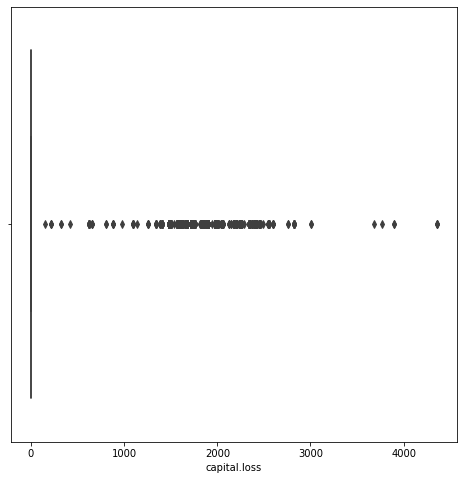

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(df_train['capital.loss'])
plt.show()

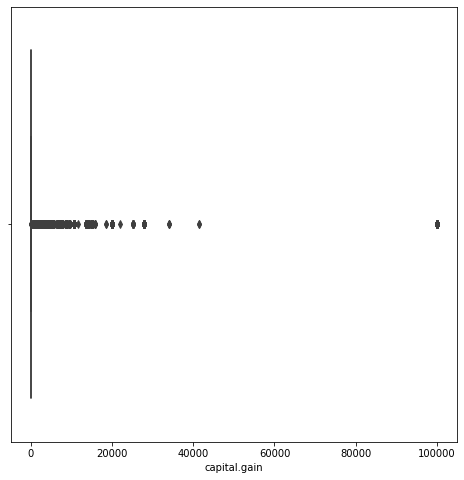

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(df_train['capital.gain'])
plt.show()

Vemos que la mayoría de los valores están concentrados entre 0 (cero) y 20000, por lo que, a nuestro criterio, no son representativos en este análisis. Entonces, vamos a dropear estas dos columnas.

In [ ]:
df_train = df_train.drop(['capital.gain', 'capital.loss'], axis = 1)
df_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
ID,,,,,,,,,,,
24451,30,Local-gov,2,Separated,Protective-serv,Own-child,White,Female,32,0,<=50K
985,37,Private,5,Married,Exec-managerial,Wife,White,Female,40,0,>50K
30229,41,Private,2,Married,Craft-repair,Husband,White,Male,60,0,>50K
7107,45,Private,5,Married,Prof-specialty,Husband,White,Male,60,0,>50K
27639,28,Private,2,Never-married,Exec-managerial,Not-in-family,White,Female,40,0,<=50K


In [ ]:
df_test = df_test.drop(['capital.gain', 'capital.loss'], axis = 1)
df_test.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country
ID,,,,,,,,,,
3643,53,Private,3,Married,Machine-op-inspct,Husband,White,Male,40,0
16036,18,Private,1,Never-married,Exec-managerial,Own-child,White,Male,25,0
9401,42,Private,3,Married,Machine-op-inspct,Wife,White,Female,37,0
17903,49,Self-emp-inc,7,Married,Prof-specialty,Husband,Black,Male,60,0
5198,58,Local-gov,5,Married,Prof-specialty,Wife,White,Female,40,0


####Education.num

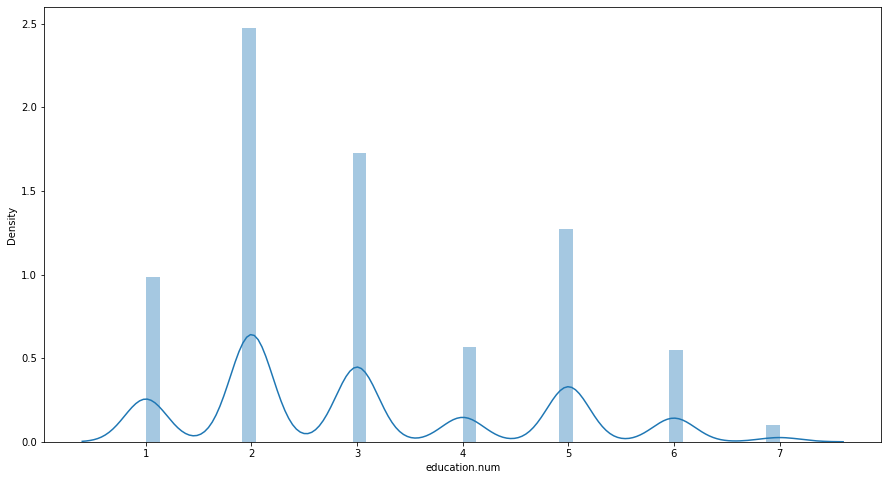

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['education.num'])
plt.show()

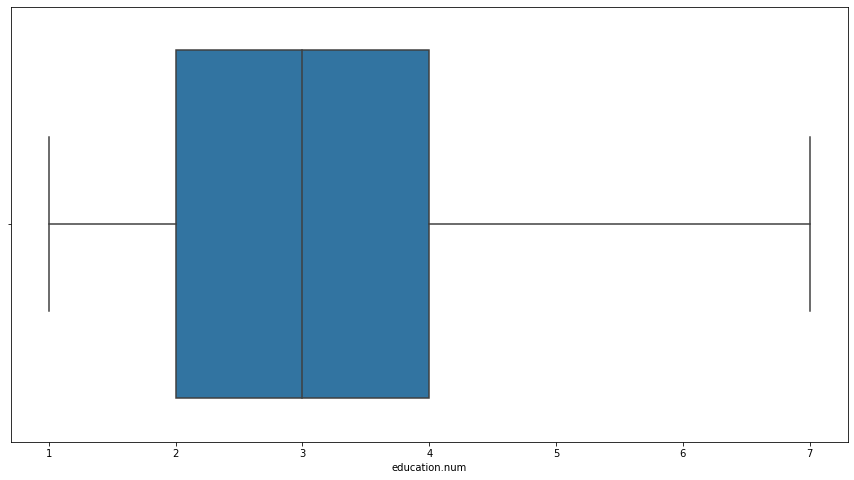

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df_train['education.num'])
plt.show()

La mayoría de las personas abandonan entre nuestras categorías 2 y 4 (entre H-S y pregrado).

####Hours.per.week

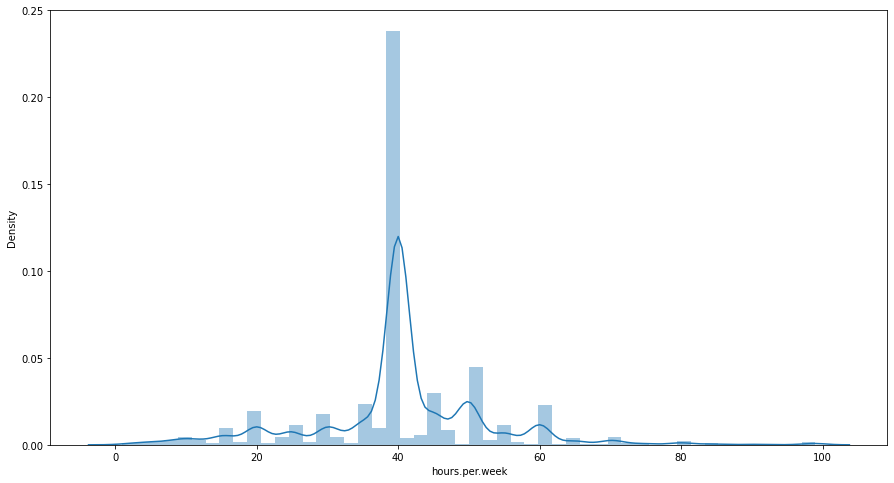

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['hours.per.week'])
plt.show()

Vemos que muchas personas trabajan alrededor de 40hs semanales. También, vemos que hay empleados que trabajan en horas muy cercanas del lado del 0, probablemente sean sin paga.

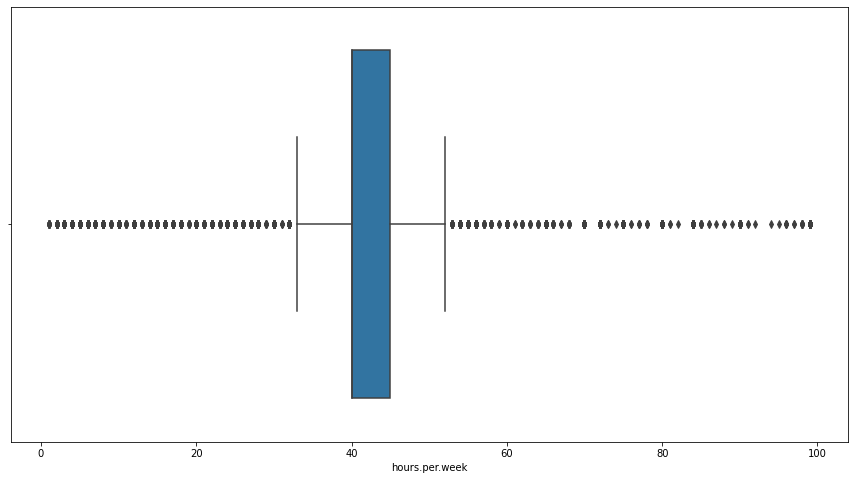

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df_train['hours.per.week'])
plt.show()

Si bien vemos la mayoría trabajando 40 hs semanales, también las encontramos en el rango de 30-50 hs. Sin embargo, hay mucha cantidad de personas que trabajan muchas horas más (hasta 100hs) y muchas horas menos. Si trabajan de más, dependiendo de su ocupación, podríamos decir que trabajan en proyectos muy complejos con demasiada dedicación y pasión, o que pasan un momento muy difícil por lo que necesitan trabajar más para aumentar sus ingresos.

####Age

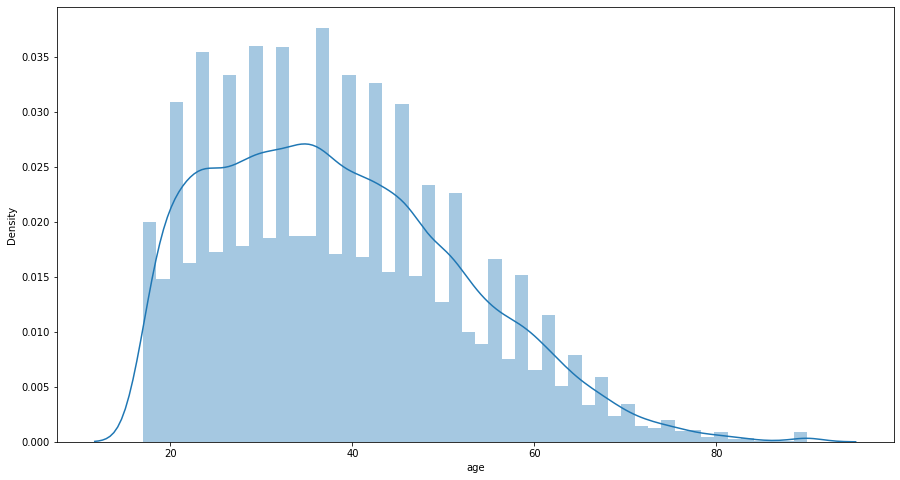

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['age'])
plt.show()

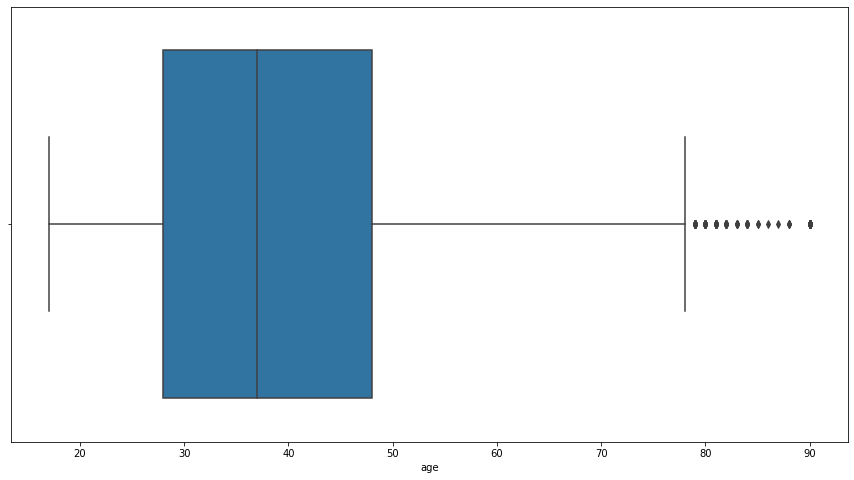

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df_train['age'])
plt.show()

Vemos que en esta distribución encontramos un rango desde 17 hasta 90 años aproximadamente. Lo que nos llama la atención es que encontramos personas muy grandes que siguen trabajando. Consideramos que esto puede ser por vocación o, lo que nos parece más acertado, porque no cuentan con un sistema de reparto para la jubilación como en Argentina, sino que es un sistema similar a las antiguas AFJP, por lo que necesitan generar sus propios ingresos.

##Correlación entre variables numéricas

In [ ]:
df_train.corr()

,age,education.num,hours.per.week
age,1.000000,0.082602,0.067608
education.num,0.082602,1.000000,0.147761
hours.per.week,0.067608,0.147761,1.000000


Como podemos observar, no hay ninguna correlación directa grande entre las variables. Sin embargo, sabemos que esto no significa que no haya variables correlacionadas, sino que no encontramos aún esa relación.


In [ ]:
columnas_numericas = ['age', 'education', 'hours_per_week']

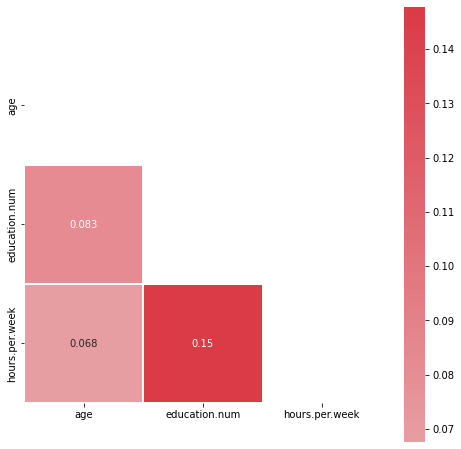

In [ ]:
mask = np.triu(np.ones_like(df_train.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(8,8))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df_train.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)
plt.show()

##Seguimos procesando la data...

Primero, vamos a renombrar 'education.num' a 'education' ya que a principios del notebook dropeamos la otra.

In [ ]:
df_train.rename(columns={'education.num':'education'}, inplace=True)

In [ ]:
df_test.rename(columns={'education.num':'education'}, inplace=True)

A las columnas restantes, vamos a reemplazar el '.' por '_' para facilitar el uso de ellas.

In [ ]:
arrNombres = df_train.columns
arrNuevosNombres = []

for nombreColumna in arrNombres:
  arrNuevosNombres.append(nombreColumna.replace(".", "_"))

df_train.columns = arrNuevosNombres

In [ ]:
arrNombres = df_test.columns
arrNuevosNombres = []

for nombreColumna in arrNombres:
  arrNuevosNombres.append(nombreColumna.replace(".", "_"))

df_test.columns = arrNuevosNombres

##Encoding Data

Ya hemos estado trabajando sobre algunas de nuestras columnas categóricas y ahora vamos a terminar encodeando las que faltan para trabajar mejor con nuestra data.

1. Encodeamos la columna 'sex' con: 
- Male = 1
- Female = 0

In [ ]:
df_train.sex[df_train.sex=="Male"] = 1
df_train.sex[df_train.sex=="Female"] = 0

In [ ]:
df_test.sex[df_test.sex=="Male"] = 1
df_test.sex[df_test.sex=="Female"] = 0

Con dummies de Pandas seguimos con las demás variables categóricas (recordemos que marital_status ya está lista).



In [ ]:
df_encoded = pd.get_dummies(df_train["workclass"], prefix="workclass")

variables = ['marital_status', "occupation", "relationship", "race"]
for nombreColumna in variables:
  df_encoded = pd.concat([df_encoded, pd.get_dummies(df_train[nombreColumna], prefix=nombreColumna)], axis=1)

In [ ]:
df_encoded_test = pd.get_dummies(df_test["workclass"], prefix="workclass")

variables = ['marital_status', "occupation", "relationship", "race"]
for nombreColumna in variables:
  df_encoded_test = pd.concat([df_encoded_test, pd.get_dummies(df_test[nombreColumna], prefix=nombreColumna)], axis=1)

Ahora, concatenamos las variables encodeadas al df principal y dropeamos las variables categóricas.



In [ ]:
df_train =  pd.concat([df_train, df_encoded], axis=1) 
df_train = df_train.drop(["workclass", "marital_status", "occupation", "relationship", "race"], axis = 1)

In [ ]:
df_test =  pd.concat([df_test, df_encoded_test], axis=1) 
df_test = df_test.drop(["workclass", "marital_status", "occupation", "relationship", "race"], axis = 1)

##Outliers

In [ ]:
numerical_columns = ['age', 'hours_per_week']

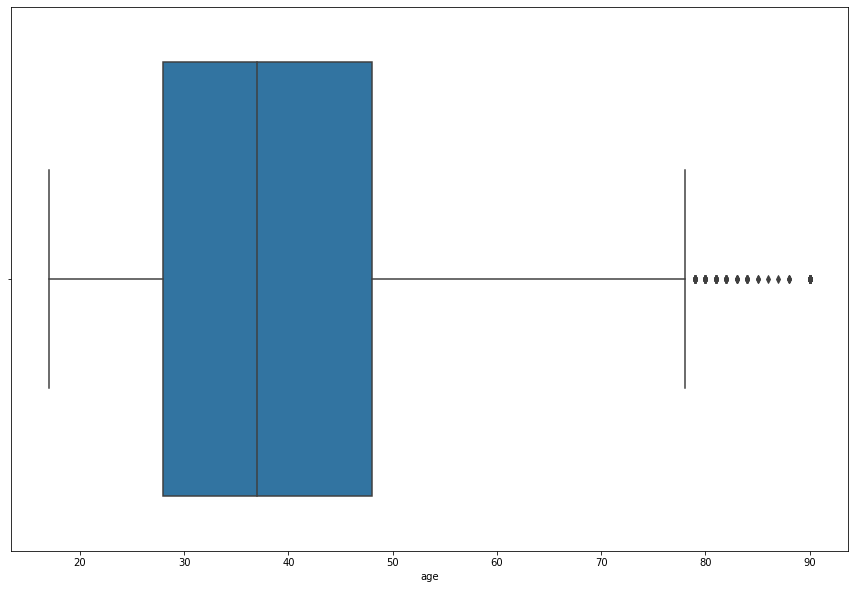

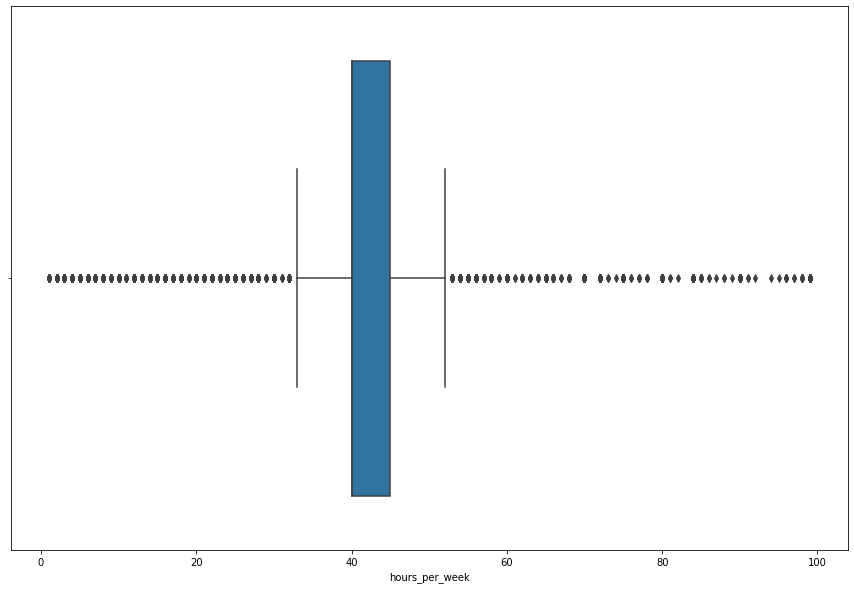

In [ ]:
for i in range(len(numerical_columns)):
    plt.figure(figsize=(15,10))
    sns.boxplot(df_train[numerical_columns[i]])
plt.show()

En este caso, consideramos que los datos son importantes, por lo que no vamos a eliminar ninguno y trabajaremos con ellos.

##Train-test split

In [ ]:
le = LabelEncoder()

In [ ]:
df_train['income2'] = le.fit_transform(df_train.income)
df_train.income2

ID
24451    0
985      1
30229    1
7107     1
27639    0
        ..
29802    0
5390     1
860      1
15795    0
23654    0
Name: income2, Length: 27635, dtype: int64

In [ ]:
X = df_train.drop(['income','income2'], axis = 1)
y = df_train.income2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

###Escalar la data

Cuando los predictores son numéricos, la escala en la que se miden, así como la magnitud de su varianza pueden influir en gran medida en el modelo. Muchos algoritmos de machine learning (SVM, redes neuronales, lasso...) son sensibles a esto, de forma que, si no se igualan de alguna forma los predictores, aquellos que se midan en una escala mayor o que tengan más varianza dominarán el modelo aunque no sean los que más relación tienen con la variable respuesta.


Lo vamos a realizar con normalización (estandarización) que consiste en transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala. Usaremos 'Normalización Z-score' que dividie cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.



```
StandarScaler()
```




In [ ]:
scaler = StandardScaler()
columnas_numericas = ['age', 'hours_per_week'] 
scaler.fit(X_train[columnas_numericas])
X_train[columnas_numericas] = scaler.transform(X_train[columnas_numericas])
X_train[columnas_numericas].head()

,age,hours_per_week
ID,,
20254,0.833757,-0.035399
15084,-0.629958,1.982656
2396,0.614200,-0.035399
14855,0.101900,-0.035399
32435,0.394643,0.771823


##Construcción de los modelos

Determinamos nuestra baseline:

In [ ]:
df_train.income.value_counts(normalize=True)

<=50K    0.757445
>50K     0.242555
Name: income, dtype: float64

En los siguientes apartados se entrenan diferentes modelos de machine learning con el objetivo de compararlos e identificar el que mejor resultado obtiene prediciendo si las diferentes personas cobran más o menos de 50k dólares anuales.

###Decision Tree Classifier

El aprendizaje de árboles de decisiones o la inducción de árboles de decisiones es uno de los enfoques de modelado predictivo utilizados en estadística , minería de datos y aprendizaje automático . Utiliza un árbol de decisiones (como modelo predictivo ) para pasar de las observaciones sobre un elemento (representado en las ramas) a las conclusiones sobre el valor objetivo del elemento (representado en las hojas). Los modelos de árbol en los que la variable de destino puede tomar un conjunto discreto de valores se denominan árboles de clasificación.






In [ ]:
max_depths = np.arange(1, 15)

In [ ]:
score_train = []
score_test = []

In [ ]:
for deep in max_depths:
  clf = DecisionTreeClassifier(max_depth = deep, random_state = 0)
  clf.fit(X_train, y_train)
  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)

  score_train.append(f1_score(y_train, y_train_pred))
  score_test.append(f1_score(y_test, y_test_pred))

In [ ]:
score_train

[0.0,
 0.5230298032748263,
 0.5230298032748263,
 0.5295368620037807,
 0.5355827491980516,
 0.5836766507070482,
 0.5924852268926301,
 0.6544426021652199,
 0.6721358942187049,
 0.6858193074095571,
 0.6997755878622305,
 0.7211354046797085,
 0.7475433924143632,
 0.7520388349514564]

In [ ]:
score_test

[0.0,
 0.5287786616752457,
 0.5287786616752457,
 0.5431778929188256,
 0.5403508771929825,
 0.536321483771252,
 0.5361990950226244,
 0.5759651307596514,
 0.5716900549115315,
 0.5533742331288343,
 0.5305599999999999,
 0.541692789968652,
 0.5404430705821741,
 0.5210943492712861]

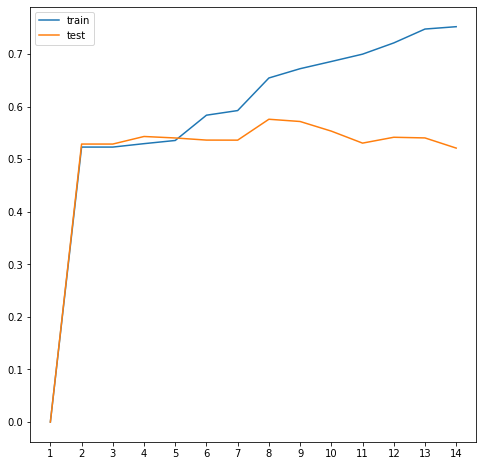

In [ ]:
plt.figure(figsize=(8,8))

plt.plot(max_depths, score_train, label="train")
plt.plot(max_depths, score_test,  label="test")
plt.xticks(max_depths)
plt.legend()

In [ ]:
tree = DecisionTreeClassifier(max_depth= 6, random_state=0)

In [ ]:
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [ ]:
round(accuracy_score(y_test, y_pred),4)

0.7829

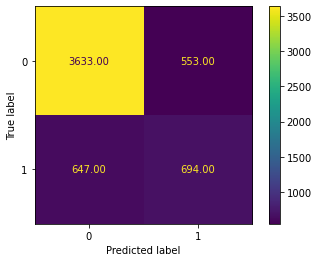

In [ ]:
plot_confusion_matrix(tree, X_test, y_test, values_format = '.2f')
plt.show()

###KNN (k-nearest neighbors) Classifier 

K-Nearest Neighbor es uno de los algoritmos de machine learning más simples. Su funcionamiento es el siguiente: para predecir una observación se identifican las K observaciones del conjunto de entrenamiento que más se asemejan a ella (en base a sus predictores) y se emplea como valor predicho el promedio de la variable respuesta en dichas observaciones. Dada su sencillez, suele dar peores resultados que otros algoritmos, pero es un buen referente como baseline.

In [ ]:
max_neigh = np.arange(1, 15)
score_neigh_train = []
score_neigh_test = []

for neigb in max_neigh:
  neighbor =  KNeighborsClassifier(n_neighbors=neigb, weights="uniform", n_jobs= -1)
  neighbor.fit(X_train, y_train)
  y_train_pred_neigh = neighbor.predict(X_train)
  y_test_pred_neigh = neighbor.predict(X_test)

  score_neigh_train.append(accuracy_score(y_train, y_train_pred_neigh))
  score_neigh_test.append(accuracy_score(y_test, y_test_pred_neigh))

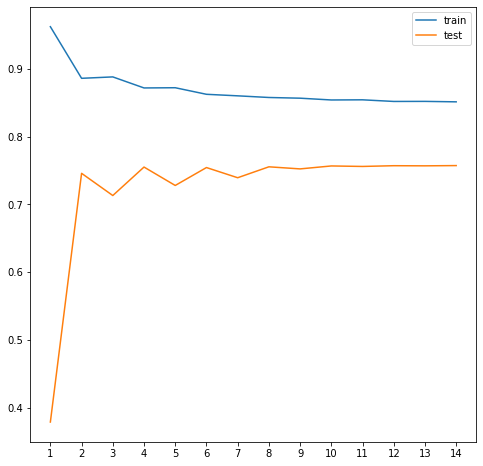

In [ ]:
plt.figure(figsize=(8,8))

plt.plot(max_neigh, score_neigh_train, label="train")
plt.plot(max_neigh, score_neigh_test,  label="test")
plt.xticks(max_neigh)
plt.legend()
plt.show()

In [ ]:
neigh = KNeighborsClassifier(n_neighbors= 8, weights="uniform", n_jobs= -1)

In [ ]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
pred_train = neigh.predict(X_train)
pred_test = neigh.predict(X_test)

In [ ]:
accuracy_score(y_train, pred_train)

0.8576081056631084

In [ ]:
accuracy_score(y_test, pred_test)

0.7553826669079067

###Random Forest
Un modelo Random Forest está formado por un conjunto de árboles de decisión individuales, cada uno entrenado con una muestra ligeramente distinta de los datos de entrenamiento generada mediante bootstrapping). La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.


In [ ]:
rf = RandomForestClassifier(max_depth = 8)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

print('Accuracy Score of Random Forest : ', accuracy_score(y_test, y_predict))
confusion_matrix(y_test, y_pred)

Accuracy Score of Random Forest :  0.8252216392256196


array([[3633,  553],
       [ 647,  694]])

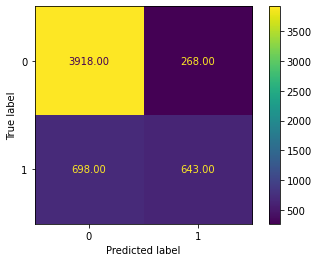

In [ ]:
plot_confusion_matrix(rf, X_test, y_test, values_format = '.2f')
plt.show()

###Predicción Final

Basándonos en los resultados obtenidos en las métricas, nos decidimos por utilizar el modelo Random-Forest para nuestra predicción final.

In [ ]:
prediccion = rf.predict(df_test)
prediccion

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_prediccion = pd.DataFrame(data = prediccion, index = df_test.index, columns = ['income'], copy = True)
df_prediccion

,income
ID,
3643,0
16036,0
9401,0
17903,1
5198,1
...,...
19468,0
7554,1
25076,0


In [ ]:
df_prediccion.to_csv('prediccion.csv')
!cp prediccion.csv "drive/My Drive/Data Science ICARO/Projects/"

##Conclusión

En el análisis exploratorio, pareciera surgir una tendencia clara de que la variable con más peso a la hora de predecir los ingresos sería 'Education'.

Finalmente, luego de investigar y que se nos presenten problemas que fuimos resolviendo, terminamos el trabajo. Elegimos el modelo "Random Forest" debido a que obtuvimos la mejor métrica de acuerdo a nuestro procesamiento de datos realizado. En los modelos de "Decision Tree" y, especialmente en "KNN Classifier", nos encontramos con resultados que apenas superan el baseline, por lo que no nos resultaban útiles en nuestro análisis.

